In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import *

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [4]:
df.default.value_counts()/len(df)

1    0.7
2    0.3
Name: default, dtype: float64

In [6]:
target = "default"

In [7]:
df[target]

0      1
1      2
2      1
3      1
4      2
5      1
6      1
7      1
8      1
9      2
10     2
11     2
12     1
13     2
14     1
15     2
16     1
17     1
18     2
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     2
      ..
970    1
971    1
972    2
973    2
974    1
975    1
976    1
977    1
978    2
979    2
980    2
981    2
982    1
983    2
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    1
997    1
998    2
999    1
Name: default, Length: 1000, dtype: int64

In [8]:
preprocessing.LabelEncoder().fit_transform(df[target])

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [30]:
%%time 

target = "default"
X = df.copy()
del X[target]
y = preprocessing.LabelEncoder().fit_transform(df[target])

# Convert the categorical features into one hot encoded values 
X_dummy = pd.get_dummies(X, drop_first=True)

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_dummy, y
        , test_size = 0.3, random_state = 1985)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDClassifier(random_state=1
                                    , loss="log", alpha=2.0
                        , max_iter=1000))
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_train, y_train_pred),
metrics.precision_score(y_train, y_train_pred), 
metrics.recall_score(y_train, y_train_pred)))

print("\nTest\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_test, y_test_pred),
metrics.precision_score(y_test, y_test_pred), 
metrics.recall_score(y_test, y_test_pred)))

Training
accuracy: 0.692857
precision: 0.000000
recall: 0.000000

Test
accuracy: 0.716667
precision: 0.000000
recall: 0.000000
CPU times: user 189 ms, sys: 6.01 ms, total: 195 ms
Wall time: 185 ms


/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a20edbcf8>)

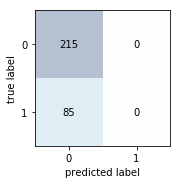

In [31]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [32]:
len(y_test)

300

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a20fc6ba8>)

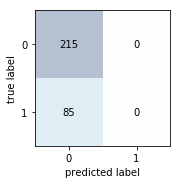

In [33]:
y_test_prob = pipe.predict_proba(X_test)[:, 1] # Probability estimate
y_test_pred = np.where(y_test_prob > 0.5, 1, 0) # Class prediction
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

Text(0.5,1,'ROC, auc: 0.708837')

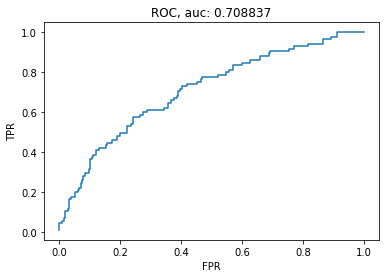

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: %f" % metrics.auc(fpr, tpr) )

In [35]:
est = pipe.steps[-1][-1]
est.coef_, est.intercept_

(array([[ 0.03956702,  0.02948951,  0.01347487,  0.00698327, -0.02079928,
         -0.00616818, -0.00308973,  0.05230457, -0.01217316, -0.06691411,
         -0.00902129,  0.03429595,  0.02525621,  0.01092005,  0.02361376,
         -0.02072432, -0.00032669,  0.00765132,  0.01587934,  0.01225399,
         -0.02516684, -0.0030694 , -0.01374039, -0.01489226,  0.0277604 ,
         -0.01542228, -0.02405939,  0.00188786, -0.01546437, -0.0088527 ,
          0.00765028,  0.01810054, -0.00935091, -0.01253183, -0.01116764,
         -0.00580218,  0.00433531, -0.02882455,  0.02331437, -0.02310265,
          0.01349855, -0.02812429,  0.0236219 , -0.00793754,  0.01497183,
          0.00358333, -0.00242959, -0.00633883]]), array([-0.80460383]))

In [36]:
est.coef_[0]

array([ 0.03956702,  0.02948951,  0.01347487,  0.00698327, -0.02079928,
       -0.00616818, -0.00308973,  0.05230457, -0.01217316, -0.06691411,
       -0.00902129,  0.03429595,  0.02525621,  0.01092005,  0.02361376,
       -0.02072432, -0.00032669,  0.00765132,  0.01587934,  0.01225399,
       -0.02516684, -0.0030694 , -0.01374039, -0.01489226,  0.0277604 ,
       -0.01542228, -0.02405939,  0.00188786, -0.01546437, -0.0088527 ,
        0.00765028,  0.01810054, -0.00935091, -0.01253183, -0.01116764,
       -0.00580218,  0.00433531, -0.02882455,  0.02331437, -0.02310265,
        0.01349855, -0.02812429,  0.0236219 , -0.00793754,  0.01497183,
        0.00358333, -0.00242959, -0.00633883])

In [40]:
summary = pd.DataFrame({"feature": X_dummy.columns
                    , "theta": est.coef_[0]})
summary["theta_abs"] = np.abs(summary.theta)
summary.sort_values("theta_abs", ascending = False)

,feature,theta,theta_abs
9,checking_balance_unknown,-0.066914,0.066914
7,checking_balance_< 0 DM,0.052305,0.052305
0,months_loan_duration,0.039567,0.039567
11,credit_history_fully repaid,0.034296,0.034296
1,amount,0.029490,0.029490
37,property_real estate,-0.028825,0.028825
41,housing_own,-0.028124,0.028124
24,savings_balance_< 100 DM,0.027760,0.027760
12,credit_history_fully repaid this bank,0.025256,0.025256
20,purpose_radio/tv,-0.025167,0.025167


Training
accuracy: 0.720000
precision: 0.551351
recall: 0.474419

Test
accuracy: 0.716667
precision: 0.500000
recall: 0.423529
CPU times: user 61.1 ms, sys: 8.23 ms, total: 69.3 ms
Wall time: 67.1 ms


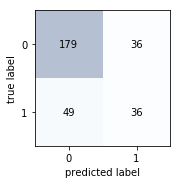

In [53]:
%%time 

target = "default"
X = df.copy()
del X[target]
y = preprocessing.LabelEncoder().fit_transform(df[target])

# Convert the categorical features into one hot encoded values 
X_dummy = pd.get_dummies(X, drop_first=True)

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_dummy, y
        , test_size = 0.3, random_state = 1985)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=2))
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_train, y_train_pred),
metrics.precision_score(y_train, y_train_pred), 
metrics.recall_score(y_train, y_train_pred)))

print("\nTest\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_test, y_test_pred),
metrics.precision_score(y_test, y_test_pred), 
metrics.recall_score(y_test, y_test_pred)))

plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [54]:
from sklearn.tree import export_graphviz
est = pipe.steps[-1][-1]
export_graphviz(est, out_file = "tree.dot", feature_names = X_dummy.columns, filled=True)
!dot -Tpng tree.dot -o tree.png